In [1]:
# best 3 solutions based on EXP1 in turns of f1 weighted is:
# XGBcls, RoadNet+Segment TOTAL, 0.5284741533025521
# XGBreg, RoadNet+Segment NO_TOTAL, 0.541270
# GDBcls, RoadNet+Segment TOTAL, 0.5107103184755486
# with ~2014, min-max, no feature selection

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
from src.experiment_based_function import SEEDS

In [4]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [65]:
def get_paper_table(means, f1_type, key_cols):
    cols_name_convert = {'RoadNet': 'RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': 'RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': 'RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': 'Segment type',
     'Segment_TOTAL_~2014': 'Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in key_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=key_cols)    
    table.columns.name = f1_type
    table.columns = [cols_name_convert[col] for col in table.columns]
    return table[['RoadNet', 'Segment total', 'Segment type', 'RoadNet+Segment total', 'RoadNet+Segment type']]

# Upsample result

In [36]:
def get_up_result(upsample_type, eval_or_grid):
    res = []

    for smote_kind in ['regular', 'svm']:
        for seed in SEEDS:
            exp_path = 'data/up_down_experiment_v2/seed_%d' % seed
            smote_path = '%s/%s_%s' % (exp_path, upsample_type, smote_kind)
            try:
                df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
                df['seed'] = seed
                df['smote_kind'] = smote_kind
                res.append(df)
            except FileNotFoundError:
                print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    return res

In [37]:
keys = ['smote_kind', 'model_name', 'feature_selection', 'ftr_combo_name']

In [38]:
up_eval_res = get_up_result('upsample_smote', 'eval')

no eval_res in data/up_down_experiment_v2/seed_789729423/upsample_smote_regular
no eval_res in data/up_down_experiment_v2/seed_789729423/upsample_smote_svm


In [39]:
up_eval_res[['up_y_dist', 'y_dist']].iloc[::-1]

,up_y_dist,y_dist
728,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
727,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
726,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
725,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
724,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
723,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
722,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
721,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
720,"{3: 109, 4: 108, 2: 79, 1: 60, 5: 52}","{3: 109, 4: 84, 2: 43, 1: 8, 5: 7}"
719,"{4: 111, 3: 111, 2: 86, 1: 61, 5: 53}","{3: 111, 4: 77, 2: 47, 1: 9, 5: 7}"


In [40]:
up_means = up_eval_res.groupby(keys).mean()[f1_choices]
up_stds = up_eval_res.groupby(keys).std()[f1_choices]

f1_type = test_f1_weighted


test_f1_weighted
smote_kind model_name feature_selection ftr_combo_name                                  
svm        XGBcls     None              RoadNet+Segment_TOTAL_~2014             0.539658
           GDBcls     None              RoadNet+Segment_NO_TOTAL_~2014          0.533829

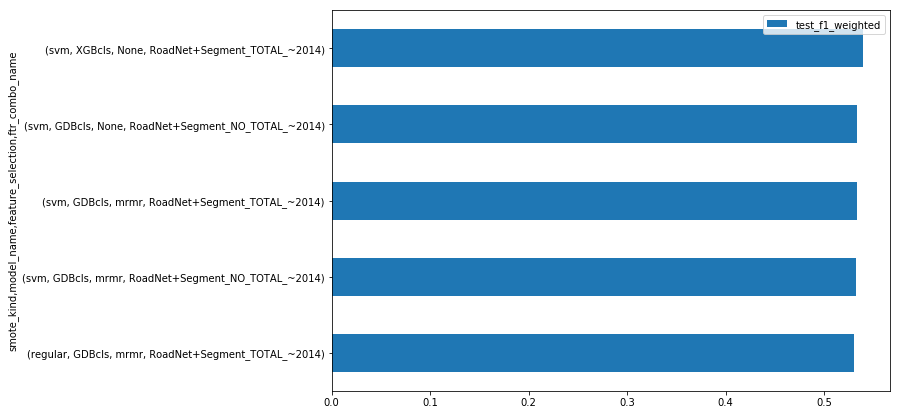

In [41]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

up_means_to_plot = up_means[[f1_type]].sort_values(f1_type, ascending=True)
up_stds_to_plot = up_stds[[f1_type]]

up_means_to_plot.iloc[-5:].plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
up_means_to_plot.iloc[:-3:-1,:]

In [30]:
means_for_pivot = up_means.reset_index()
means_for_pivot['key'] = means_for_pivot.apply(lambda x: (x.model_name, x.feature_selection), axis=1)
table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
table.columns.name = f1_type

In [67]:
key_cols = ['model_name', 'feature_selection', 'smote_kind']
table = get_paper_table(up_means, f1_type, key_cols)
table.to_csv('deliverables/EXP3 upsampling table.csv', encoding='utf8')

In [ ]:
on_train_grid_res = get_up_result('upsample_smote', 'grid')

In [ ]:
on_train_grid_res[on_train_grid_res['kind']=='cls'].groupby(keys).mean()[['mean_test']]

# downsample result

In [68]:
from csl_downsampling_exp3_v2 import DOWN_SEEDS

In [69]:
def get_down_result(eval_or_grid):
    res = []

    for seed in SEEDS:
        exp_path = 'data/up_down_experiment_v2/seed_%d' % seed
        smote_path = '%s/downsample' % (exp_path)

        try:
            df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
            df['seed'] = seed
            res.append(df)
        except FileNotFoundError:
            print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    return res

In [70]:
down_res = get_down_result('eval')

In [71]:
down_keys = ['model_name', 'feature_selection', 'ftr_combo_name']

In [73]:
down_means = down_res.groupby(down_keys).mean()[f1_choices]
down_stds = down_res.groupby(down_keys).std()[f1_choices]

In [17]:
# down_res.groupby(down_keys).count()[f1_choices]

f1_type = test_f1_weighted


test_f1_weighted
model_name feature_selection ftr_combo_name                               
XGBreg     mrmr              RoadNet+Segment_TOTAL_~2014          0.391959
           None              RoadNet+Segment_TOTAL_~2014          0.391959

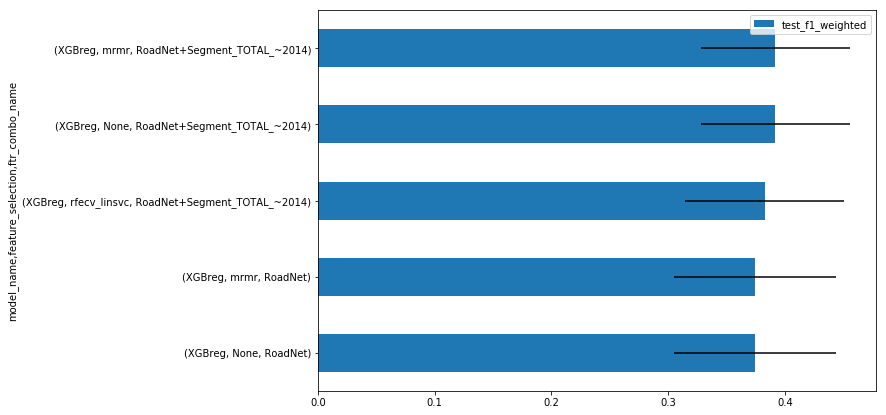

In [74]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

down_means_to_plot = down_means[[f1_type]].sort_values(f1_type, ascending=True)
down_stds_to_plot = down_stds[[f1_type]]

down_means_to_plot.iloc[-5:].plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
down_means_to_plot.iloc[:-3:-1,:]

In [75]:
key_cols = ['model_name', 'feature_selection']
table = get_paper_table(down_means, f1_type, key_cols)
table.to_csv('deliverables/EXP3 downsampling table.csv', encoding='utf8')